In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import os
import random as rand
import sys
import collections
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
import re
import csv
import datetime

/Users/Charlemagne/Library/Python/3.7/lib/python/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
def readInCSV(trainFile,testFile):
    train = pd.read_csv(trainFile)
    col_names_tr = list(train.columns)
    row_tr, columns_tr = train.shape
    
    test = pd.read_csv(testFile)
    col_names_test = list(test.columns)
    row_test, columns_test = test.shape
 
    #split data into "labels" and predictors (The actual trainging set was split 70-30 since the testing set has no outcomes)
    X_tr = [] #predictors training
    y_tr = [] #predictions training
    X_test = [] #features testing
    y_test = [] #predicitions testing
    
    for index, row in train.iterrows():
        y_tr.append(list(row.ix[1:13]))
        X_tr.append(list(row.ix[13:]))
        
    for index, row in test.iterrows():
        y_test.append(list(row.ix[1:13]))
        X_test.append(list(row.ix[13:]))
        
    return X_tr,y_tr,X_test,y_test

In [17]:
X_tr_pca,y_tr_pca,X_test_pca,y_test_pca = readInCSV("../data/NAN_to_0/PCA_split_data_train.csv","../data/NAN_to_0/PCA_split_data_test.csv")
X_tr_orig,y_tr_orig,X_test_orig,y_test_orig = readInCSV("../data/NAN_to_0/ORIGINAL_split_data_train.csv","../data/NAN_to_0/ORIGINAL_split_data_test.csv")


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: 
.ix is deprecated. Please us

## Decision Tree (PCA Data)


In [6]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_tr_pca,y_tr_pca)
y_pred = regressor.predict(X_test_pca)
print(np.sqrt(mean_squared_log_error(y_test_pca, y_pred,multioutput='raw_values')))
print(np.sqrt(mean_squared_log_error(y_test_pca, y_pred)))

[1.88124979 1.85973342 1.75981817 1.62463089 2.30205666 2.82440022
 2.98257311 3.00946801 3.29549524 3.40252322 3.47189648 3.6014681 ]
2.7602162787727558


## Decision Tree (Original Data)

In [7]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_tr_orig,y_tr_orig)
y_pred = regressor.predict(X_test_orig)
print(np.sqrt(mean_squared_log_error(y_test_orig, y_pred,multioutput='raw_values')))
print(np.sqrt(mean_squared_log_error(y_test_orig, y_pred)))

[0.97686335 1.309102   1.27844795 1.19780517 1.72842948 1.6008617
 1.51430795 1.57359452 1.67207917 2.02395116 2.16355089 2.32213112]
1.6588701932435483


------------------------

## Random Forest (PCA Data)

In [8]:
RFregr = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=1000)
RFregr.fit(X_tr_pca,y_tr_pca)
y_pred = RFregr.predict(X_test_pca)
print(np.sqrt(mean_squared_log_error(y_test_pca, y_pred,multioutput='raw_values')))
print(np.sqrt(mean_squared_log_error(y_test_pca, y_pred)))

[1.58148569 1.68412589 1.5351987  1.43564457 1.74710074 1.96884323
 2.07025245 2.20303742 2.3352524  2.63922237 2.70155399 2.76537859]
2.1053092064943013


## Random Forest (Original Data)

In [9]:
RFregr = RandomForestRegressor(max_depth=10, random_state=0,n_estimators=1000)
RFregr.fit(X_tr_orig,y_tr_orig)
y_pred = RFregr.predict(X_test_orig)
print(np.sqrt(mean_squared_log_error(y_test_orig, y_pred,multioutput='raw_values')))
print(np.sqrt(mean_squared_log_error(y_test_orig, y_pred)))

[0.80089902 1.11179098 1.13401356 1.07968089 1.4540805  1.80041908
 1.95577837 2.11641953 2.25826646 2.59543715 2.65212392 2.75718253]
1.9248647957603784


-----------

## SVM/SVR (PCA Data)

In [11]:
clf = SVR(kernel="rbf",gamma='auto', C=1.0, epsilon=0.2)
multi_clf = MultiOutputRegressor(clf)
multi_clf.fit(X_tr_pca,y_tr_pca)
y_pred = multi_clf.predict(X_test_pca)
print(np.sqrt(mean_squared_log_error(y_test_pca, y_pred,multioutput='raw_values')))
print(np.sqrt(mean_squared_log_error(y_test_pca, y_pred)))

[1.34902169 1.41216253 1.37616898 1.31884526 1.70750222 1.95788325
 2.05074088 2.10753728 2.23462177 2.5031306  2.59302153 2.65897147]
1.9978418734749357


## SVM/SVR (Original Data)

In [12]:
clf = SVR(kernel="rbf",gamma='auto', C=1.0, epsilon=0.2)
multi_clf = MultiOutputRegressor(clf)
multi_clf.fit(X_tr_orig,y_tr_orig)
y_pred = multi_clf.predict(X_test_orig)
print(np.sqrt(mean_squared_log_error(y_test_orig, y_pred,multioutput='raw_values')))
print(np.sqrt(mean_squared_log_error(y_test_orig, y_pred)))

[1.34867022 1.41179375 1.37569704 1.31842204 1.70722529 1.95564185
 2.0489972  2.10662973 2.23392466 2.50246743 2.59231772 2.65835547]
1.9970397083951417


----------

## MLP(NN) (PCA Data) -- Note: np.abs() needs to be used on prediction because it guesses negative values sometimes... oh well

In [13]:
bpnn = MLPRegressor(max_iter = 50000) #Very basic BPNN/MLP
bpnn.fit(X_tr_pca,y_tr_pca)
y_pred = bpnn.predict(X_test_pca)
print(np.sqrt(mean_squared_log_error(y_test_pca, np.abs(y_pred),multioutput='raw_values'))) #It's weird that it predicts negative vals.. oh well
print(np.sqrt(mean_squared_log_error(y_test_pca, np.abs(y_pred))))

[2.51696171 2.49133313 2.33613791 2.18833471 2.4951105  2.72695011
 2.57913082 2.69008867 2.79087368 2.90215937 2.93512816 2.9726397 ]
2.645776214369862


## MLP(NN) (Original Data) -- Note: np.abs() needs to be used on prediction because it guesses negative values sometimes... oh well

In [14]:
bpnn = MLPRegressor(max_iter = 50000) #Very basic BPNN/MLP
bpnn.fit(X_tr_orig,y_tr_orig)
y_pred = bpnn.predict(X_test_orig)
print(np.sqrt(mean_squared_log_error(y_test_orig, np.abs(y_pred),multioutput='raw_values'))) #It's weird that it predicts negative vals.. oh well
print(np.sqrt(mean_squared_log_error(y_test_orig, np.abs(y_pred))))

[1.93821749 1.99352288 1.84463565 1.69125972 2.15414648 2.46334285
 2.28586197 2.39381343 2.56685386 2.80352242 2.72980473 3.02815308]
2.358102962169239


-------

## kNN (PCA Data)


In [15]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_tr_pca,y_tr_pca)
y_pred = neigh.predict(X_test_pca)
print(np.sqrt(mean_squared_log_error(y_test_pca, y_pred,multioutput='raw_values')))
print(np.sqrt(mean_squared_log_error(y_test_pca, y_pred)))

[1.37359479 1.52616017 1.52944453 1.44291999 1.73108605 2.02886042
 2.04111615 2.23787946 2.30771045 2.65521729 2.65426601 2.69909518]
2.07425264644338


## kNN (Original Data)

In [16]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_tr_orig,y_tr_orig)
y_pred = neigh.predict(X_test_orig)
print(np.sqrt(mean_squared_log_error(y_test_orig, y_pred,multioutput='raw_values')))
print(np.sqrt(mean_squared_log_error(y_test_orig, y_pred)))

[1.15601296 1.35008633 1.32809977 1.20840453 1.574566   1.89729981
 2.00857386 2.15033911 2.28736233 2.63296066 2.69018617 2.78348657]
2.0056156339976496


--------

## Linear Regression (PCA Data) -- Note: np.abs() needs to be used on prediction because it guesses negative values sometimes... oh well

In [18]:
reg = LinearRegression()
reg.fit(X_tr_pca,y_tr_pca)
#joblib.dump(reg, "param_search/saved_models/best_linearRegression_PCA_to_0.joblib")
y_pred = reg.predict(X_test_pca)
print(np.sqrt(mean_squared_log_error(y_test_pca, np.abs(y_pred),multioutput='raw_values')))
#print(np.sqrt(mean_squared_log_error(y_test_pca, np.abs(y_pred))))

[1.99922931 1.97896197 1.58761217 1.57141605 1.55190938 1.39533485
 1.3224631  1.43851585 1.45253889 1.47234398 1.32050698 1.31682563]


## Linear Regression (Original Data) -- Note: np.abs() needs to be used on prediction because it guesses negative values sometimes... oh well

In [19]:
reg = LinearRegression()
reg.fit(X_tr_orig,y_tr_orig)
#joblib.dump(reg, "param_search/saved_models/best_linearRegression_ORIGINAL_to_0.joblib")
y_pred = reg.predict(X_test_orig)
print(np.sqrt(mean_squared_log_error(y_test_orig, np.abs(y_pred),multioutput='raw_values')))
#print(np.sqrt(mean_squared_log_error(y_test_pca, np.abs(y_pred))))

[1.82344124 2.04424251 1.67578998 1.44640048 1.68287069 1.51030626
 1.4079919  1.49129052 1.56431944 1.48954767 1.52494815 1.54955297]


## Read in Monthly CSV Results

In [2]:
monthlyErrors = {}
with open("./graphs/Best_Model_Info.csv","r") as f:
    reader = csv.reader(f)
    for i, line in enumerate(reader):
        if i == 0:
            continue
        monthlyErrors[line[0]] = [float(x) for x in line[3:]]

## kNN Monthly RMSLE Results

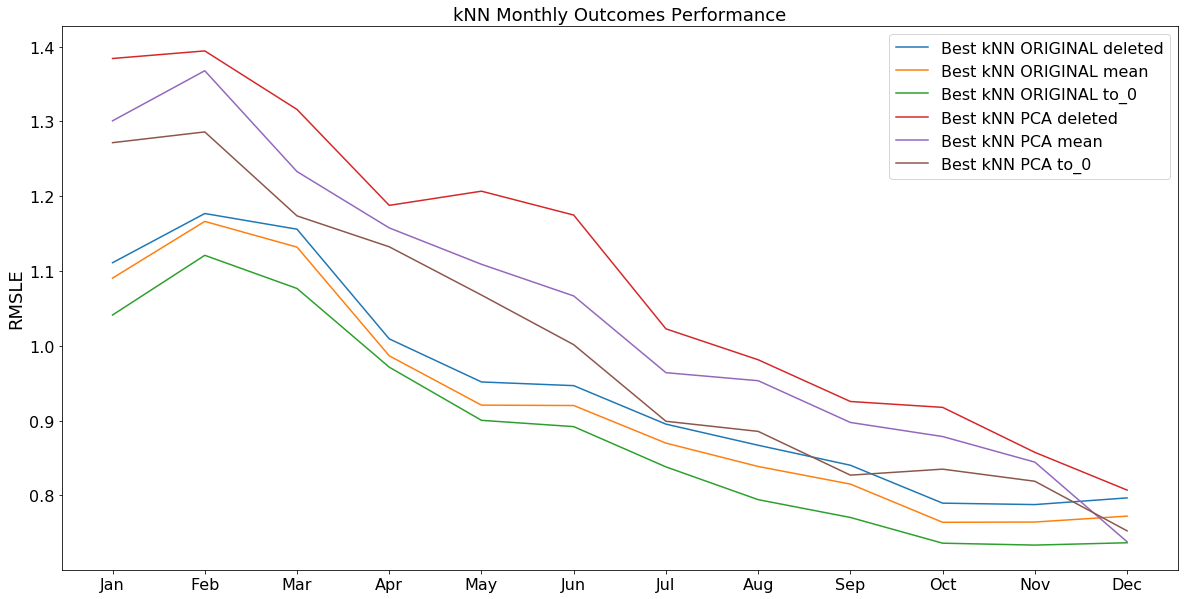

In [3]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
x = np.arange(1,13,1)

dates_d = pd.date_range('2010-01-01', '2017-12-31', freq='D')
df_year = pd.DataFrame(np.random.randint(100, 200, (dates_d.shape[0], 1)), columns=['Data'])
df_year.index = dates_d
pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt.columns = pt.columns.droplevel()
ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels)
ax.legend(loc='center left')
ax.tick_params(labelsize=16)

ax.plot(x,monthlyErrors["Best kNN ORIGINAL deleted"],label = "Best kNN ORIGINAL deleted")
ax.plot(x,monthlyErrors["Best kNN ORIGINAL mean"],label ="Best kNN ORIGINAL mean")
ax.plot(x,monthlyErrors["Best kNN ORIGINAL to_0"],label ="Best kNN ORIGINAL to_0")
ax.plot(x,monthlyErrors["Best kNN PCA deleted"],label ="Best kNN PCA deleted")
ax.plot(x,monthlyErrors["Best kNN PCA mean"],label ="Best kNN PCA mean")
ax.plot(x,monthlyErrors["Best kNN PCA to_0"],label ="Best kNN PCA to_0")

ax.set_title("kNN Monthly Outcomes Performance",fontsize=18)
ax.set_ylabel("RMSLE",fontsize=18)
ax.legend(loc='upper right',fontsize=16)
plt.savefig("./graphs/kNN_Monthly_Outcomes.png")

## MLP Monthly RMSLE Results

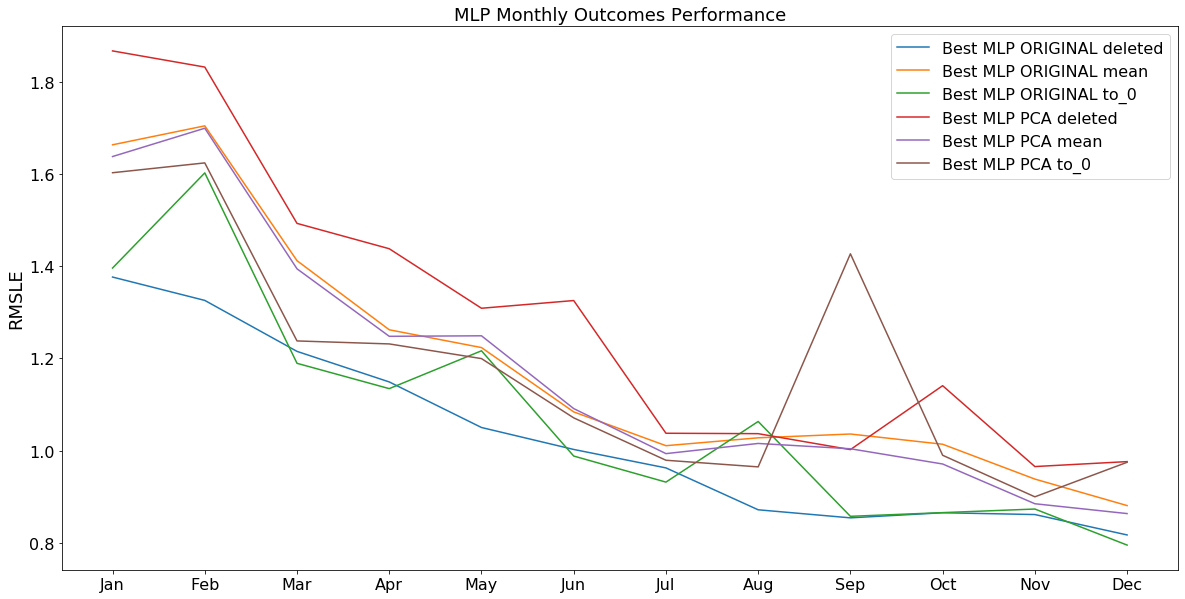

In [4]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
x = np.arange(1,13,1)

dates_d = pd.date_range('2010-01-01', '2017-12-31', freq='D')
df_year = pd.DataFrame(np.random.randint(100, 200, (dates_d.shape[0], 1)), columns=['Data'])
df_year.index = dates_d
pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt.columns = pt.columns.droplevel()
ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels)
ax.legend(loc='center left')
ax.tick_params(labelsize=16)

ax.plot(x,monthlyErrors["Best MLP ORIGINAL deleted"],label = "Best MLP ORIGINAL deleted")
ax.plot(x,monthlyErrors["Best MLP ORIGINAL mean"],label ="Best MLP ORIGINAL mean")
ax.plot(x,monthlyErrors["Best MLP ORIGINAL to_0"],label ="Best MLP ORIGINAL to_0")
ax.plot(x,monthlyErrors["Best MLP PCA deleted"],label ="Best MLP PCA deleted")
ax.plot(x,monthlyErrors["Best MLP PCA mean"],label ="Best MLP PCA mean")
ax.plot(x,monthlyErrors["Best MLP PCA to_0"],label ="Best MLP PCA to_0")

ax.set_title("MLP Monthly Outcomes Performance",fontsize=18)
ax.set_ylabel("RMSLE",fontsize=18)
ax.legend(loc='upper right',fontsize=16)
plt.savefig("./graphs/MLP_Monthly_Outcomes.png")

## Decision Tree Monthly RMSLE Results

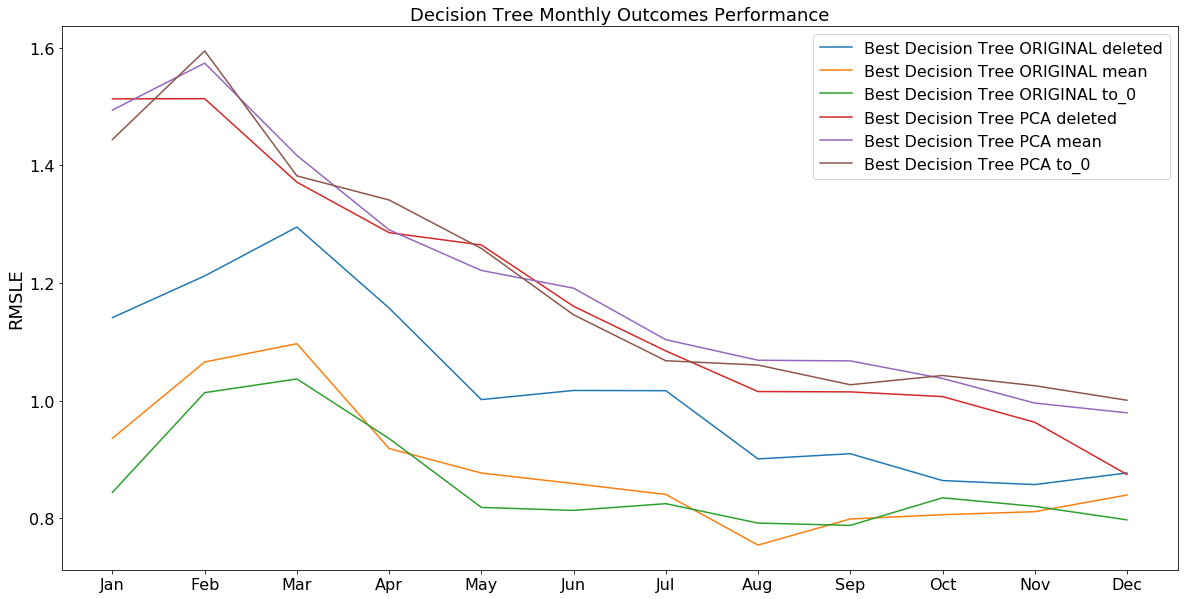

In [5]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
x = np.arange(1,13,1)

dates_d = pd.date_range('2010-01-01', '2017-12-31', freq='D')
df_year = pd.DataFrame(np.random.randint(100, 200, (dates_d.shape[0], 1)), columns=['Data'])
df_year.index = dates_d
pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt.columns = pt.columns.droplevel()
ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels)
ax.legend(loc='center left')
ax.tick_params(labelsize=16)

ax.plot(x,monthlyErrors["Best Decision Tree ORIGINAL deleted"],label = "Best Decision Tree ORIGINAL deleted")
ax.plot(x,monthlyErrors["Best Decision Tree ORIGINAL mean"],label ="Best Decision Tree ORIGINAL mean")
ax.plot(x,monthlyErrors["Best Decision Tree ORIGINAL to_0"],label ="Best Decision Tree ORIGINAL to_0")
ax.plot(x,monthlyErrors["Best Decision Tree PCA deleted"],label ="Best Decision Tree PCA deleted")
ax.plot(x,monthlyErrors["Best Decision Tree PCA mean"],label ="Best Decision Tree PCA mean")
ax.plot(x,monthlyErrors["Best Decision Tree PCA to_0"],label ="Best Decision Tree PCA to_0")

ax.set_title("Decision Tree Monthly Outcomes Performance",fontsize=18)
ax.set_ylabel("RMSLE",fontsize=18)
ax.legend(loc='upper right',fontsize=16)
plt.savefig("./graphs/Decision_Tree_Monthly_Outcomes.png")

## SVM Monthly RMSLE Results

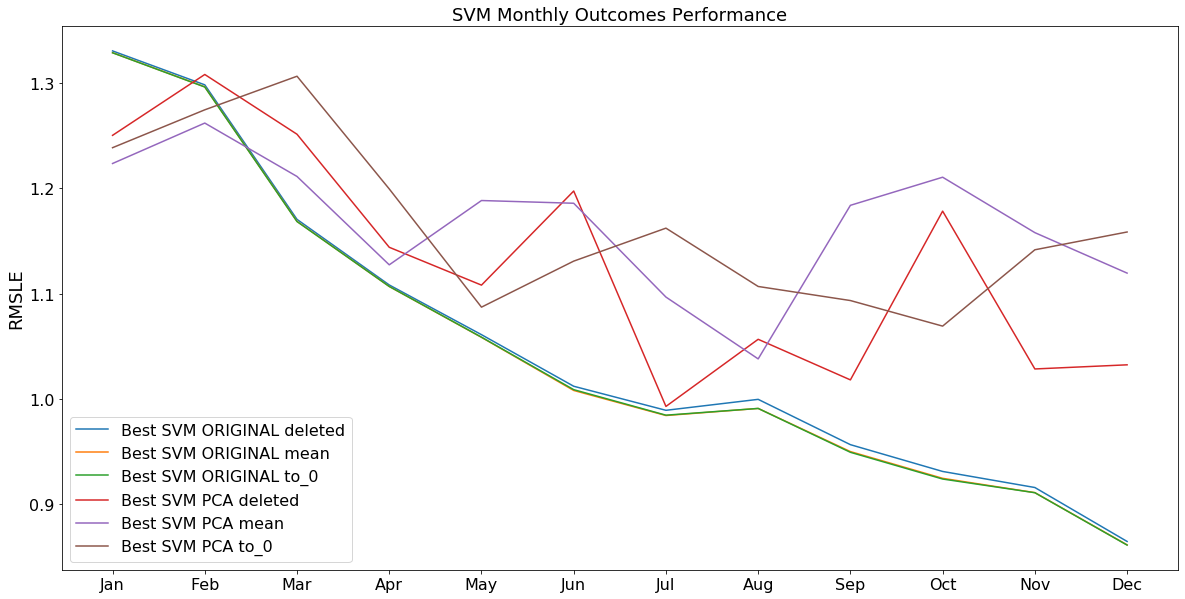

In [6]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
x = np.arange(1,13,1)

dates_d = pd.date_range('2010-01-01', '2017-12-31', freq='D')
df_year = pd.DataFrame(np.random.randint(100, 200, (dates_d.shape[0], 1)), columns=['Data'])
df_year.index = dates_d
pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt.columns = pt.columns.droplevel()
ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels)
ax.legend(loc='center left')
ax.tick_params(labelsize=16)

ax.plot(x,monthlyErrors["Best SVM ORIGINAL deleted"],label = "Best SVM ORIGINAL deleted")
ax.plot(x,monthlyErrors["Best SVM ORIGINAL mean"],label ="Best SVM ORIGINAL mean")
ax.plot(x,monthlyErrors["Best SVM ORIGINAL to_0"],label ="Best SVM ORIGINAL to_0")
ax.plot(x,monthlyErrors["Best SVM PCA deleted"],label ="Best SVM PCA deleted")
ax.plot(x,monthlyErrors["Best SVM PCA mean"],label ="Best SVM PCA mean")
ax.plot(x,monthlyErrors["Best SVM PCA to_0"],label ="Best SVM PCA to_0")

ax.set_title("SVM Monthly Outcomes Performance",fontsize=18)
ax.set_ylabel("RMSLE",fontsize=18)
ax.legend(loc='lower left',fontsize=16)
plt.savefig("./graphs/SVM_Monthly_Outcomes.png")

## Random Forest Monthly RMSLE Results

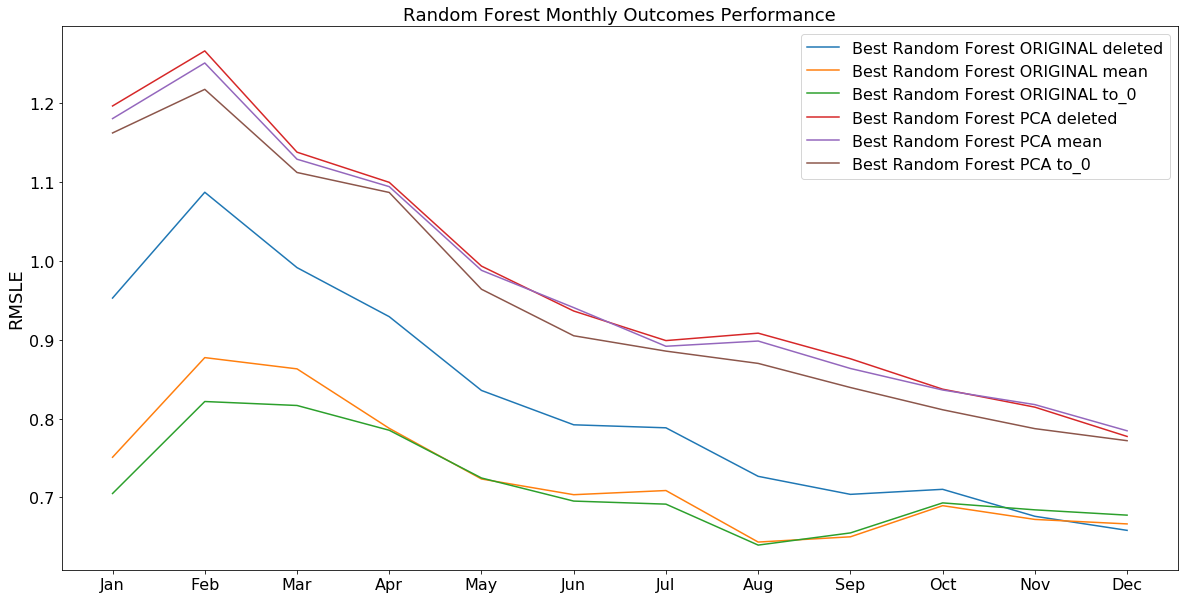

In [7]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
x = np.arange(1,13,1)

dates_d = pd.date_range('2010-01-01', '2017-12-31', freq='D')
df_year = pd.DataFrame(np.random.randint(100, 200, (dates_d.shape[0], 1)), columns=['Data'])
df_year.index = dates_d
pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt.columns = pt.columns.droplevel()
ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels)
ax.legend(loc='center left')
ax.tick_params(labelsize=16)

ax.plot(x,monthlyErrors["Best Random Forest ORIGINAL deleted"],label = "Best Random Forest ORIGINAL deleted")
ax.plot(x,monthlyErrors["Best Random Forest ORIGINAL mean"],label ="Best Random Forest ORIGINAL mean")
ax.plot(x,monthlyErrors["Best Random Forest ORIGINAL to_0"],label ="Best Random Forest ORIGINAL to_0")
ax.plot(x,monthlyErrors["Best Random Forest PCA deleted"],label ="Best Random Forest PCA deleted")
ax.plot(x,monthlyErrors["Best Random Forest PCA mean"],label ="Best Random Forest PCA mean")
ax.plot(x,monthlyErrors["Best Random Forest PCA to_0"],label ="Best Random Forest PCA to_0")

ax.set_title("Random Forest Monthly Outcomes Performance",fontsize=18)
ax.set_ylabel("RMSLE",fontsize=18)
ax.legend(loc='upper right',fontsize=16)
plt.savefig("./graphs/Random_Forest_Monthly_Outcomes.png")

## Linear Regression Monthly RMSLE Results

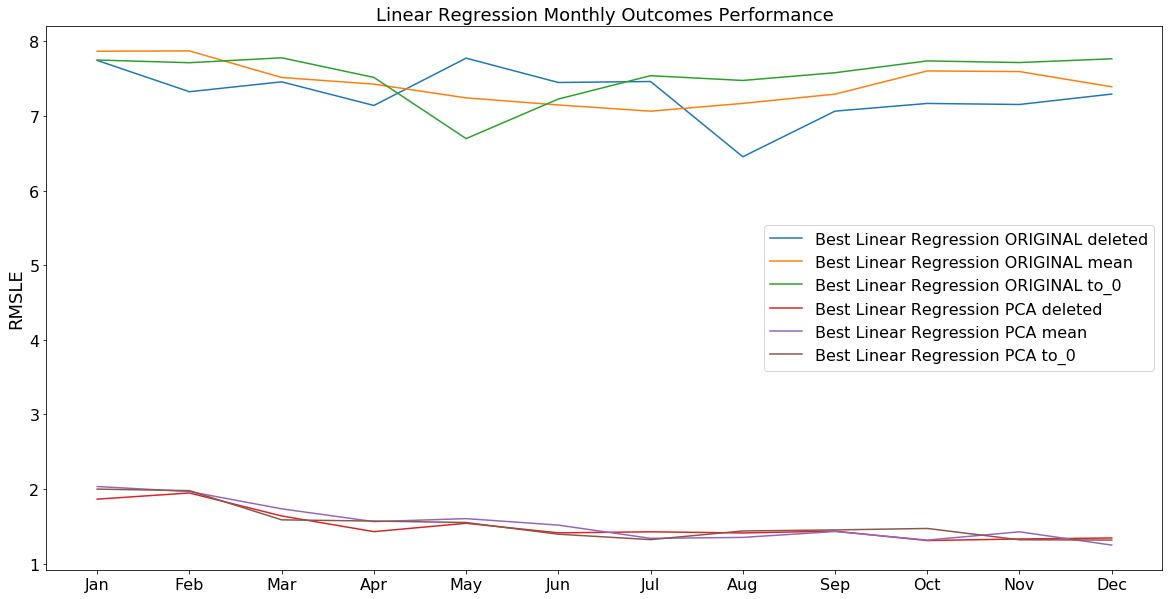

In [8]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
x = np.arange(1,13,1)

dates_d = pd.date_range('2010-01-01', '2017-12-31', freq='D')
df_year = pd.DataFrame(np.random.randint(100, 200, (dates_d.shape[0], 1)), columns=['Data'])
df_year.index = dates_d
pt = pd.pivot_table(df_year, index=df_year.index.month, columns=df_year.index.year, aggfunc='sum')
pt.columns = pt.columns.droplevel()
ticklabels = [datetime.date(1900, item, 1).strftime('%b') for item in pt.index]
ax.set_xticks(np.arange(1,13))
ax.set_xticklabels(ticklabels)
ax.legend(loc='center left')
ax.tick_params(labelsize=16)

ax.plot(x,monthlyErrors["Best linearRegression ORIGINAL deleted"],label = "Best Linear Regression ORIGINAL deleted")
ax.plot(x,monthlyErrors["Best linearRegression ORIGINAL mean"],label ="Best Linear Regression ORIGINAL mean")
ax.plot(x,monthlyErrors["Best linearRegression ORIGINAL to_0"],label ="Best Linear Regression ORIGINAL to_0")
ax.plot(x,monthlyErrors["Best linearRegression PCA deleted"],label ="Best Linear Regression PCA deleted")
ax.plot(x,monthlyErrors["Best linearRegression PCA mean"],label ="Best Linear Regression PCA mean")
ax.plot(x,monthlyErrors["Best linearRegression PCA to_0"],label ="Best Linear Regression PCA to_0")

ax.set_title("Linear Regression Monthly Outcomes Performance",fontsize=18)
ax.set_ylabel("RMSLE",fontsize=18)
ax.legend(loc='center right',fontsize=16)
plt.savefig("./graphs/Linear_Regression_Monthly_Outcomes.png")